Sampling Universities from the THES Rankings
========================

Having processed the THES files to a csv file we now want to sample a selection of the universities for our own analysis purposes. To do this we use pandas sampling tools and generate a list based on ranking groups as described below.

In [1]:
import os.path
import pandas
input_data_folder = 'data/input/'
output_data_folder = 'data/output/'
thes_csv_file = os.path.join(output_data_folder, 'thes_2016_ranking.csv')



In [2]:
import pandas as pd
tdf = pd.read_csv(thes_csv_file)

In [8]:
regions = tdf.groupby(['rank_group','subregion'])
regions['int_rank'].count()

rank_group  subregion                
0001-15     Northern America              11
            Northern Europe                3
            Western Europe                 1
0016-50     Australia and New Zealand      2
            Eastern Asia                   5
            Northern America              18
            Northern Europe                5
            South-Eastern Asia             1
            Western Europe                 5
0051-100    Australia and New Zealand      4
            Eastern Asia                   4
            Northern America              18
            Northern Europe                8
            South-Eastern Asia             1
            Western Europe                16
0101-200    Australia and New Zealand      3
            Eastern Asia                  10
            Eastern Europe                 1
            Northern America              21
            Northern Europe               28
            Southern Africa                1
            South

Sampling
-------

We sample 15 from each rank group at random and write these out as sample files for inspection. We'll choose one that seems to have reasonable distribution and then supplement it as seems appropriate.

In [9]:
def sample(i):
    return tdf.groupby(['rank_group']).apply(lambda x: x.sample(n=i))

In [11]:
for i in [0,1,2]:
    s = sample(15)
    filename = 'uni_sample_{}.csv'.format(str(i))
    s.to_csv(os.path.join(output_data_folder, filename), 
             columns = ['rank_group', 'int_rank', 'name', 'region', 'subregion', 'country'], 
             encoding='utf-8')

Based on a quick look it seems like sample1 is the best of the three produced with some from both Africa and South America and a few from Southern Asia.

In [34]:
s = pd.read_csv(os.path.join(output_data_folder, 'uni_sample_1.csv'))
s = s[s['int_rank'] <= 1000]

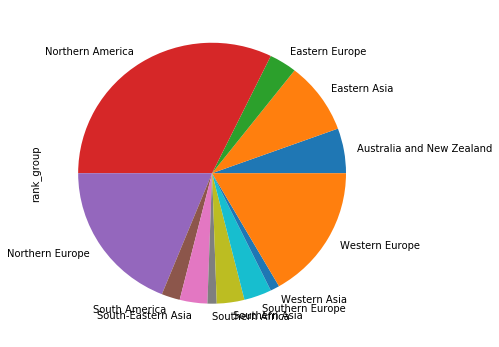

In [36]:
p1 = s.groupby(['subregion']).count().plot.pie(figsize=(6,6), y='rank_group', legend=False)

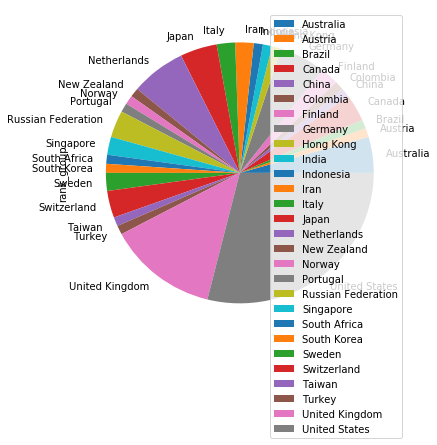

In [41]:
p2 = s.groupby(['country']).count().plot.pie(figsize=(6,6), y='rank_group')

Supplementing the Sample List
-----------------------------

The current sample list does not include UCT, one of our core test list and is otherwise weak on Africa and potentially India. Going back to the full list we can select a few examples to add. We will also be only be sampling from those ranked up to 1000.

A random selection of those from Africa.

In [47]:
tdf = tdf[tdf['int_rank'] <= 1000]
africa = tdf[tdf['region']=='Africa']
africa_sample = africa.sample(5)
africa_sample['name']

170               University of Cape Town
977                 University of Tlemcen
902    University of Marrakech Cadi Ayyad
434           University of KwaZulu-Natal
827                      Cairo University
Name: name, dtype: object

A random selection from southern Asia

In [54]:
south_asia = tdf[tdf['subregion'] == 'Southern Asia']
south_asia_sample = south_asia.sample(5)
south_asia_sample['country']

775     Iran
678    India
986    India
269    India
931    India
Name: country, dtype: object

In [55]:
south_asia_sample['name']

775                                 University of Tabriz
678    Indian Institute of Technology (Indian School ...
986                                       VIT University
269                          Indian Institute of Science
931                                   Osmania University
Name: name, dtype: object

Random selection from Latin America. Wanted to include Mexico which requires a little bit more manipulation.

In [67]:
south_america = tdf[tdf['subregion'] == 'South America']
mexico = tdf[tdf['country'] == 'Mexico']
latin_america = pd.concat([south_america, mexico])
latin_america_sample = latin_america.sample(5)
latin_america_sample['country']

714      Mexico
859      Brazil
843       Chile
570    Colombia
936      Brazil
Name: country, dtype: object

In [68]:
latin_america_sample['name']

714    Monterrey Institute of Technology and Higher E...
859                     Federal University of São Carlos
843                             University of Concepción
570                      Pontifical Javeriana University
936             Pontifical Catholic University of Paraná
Name: name, dtype: object

Concatenate and deduplicate the list and then write to the final sample list for a set of just over 100 institutions. Will still be missing some of the our core set of ten. Because the sample only wrote out a subset of columns there are some warnings thrown.

In [71]:
sample100 = pd.concat([s, latin_america_sample, south_asia_sample, africa_sample])
sample100.drop_duplicates()

/Users/Shared/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


,Unnamed: 1,citations,country,country_code,female_%,foreign_students_%,gender_ratio,industry_income,int_rank,international_outlook,...,overall_score,rank,rank_group,rank_group.1,region,research_score,student_fte,students_per_staff,subregion,teaching_score
0,10.0,NaN,United States,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,0001-15,0001-15,Americas,NaN,NaN,NaN,Northern America,NaN
1,6.0,NaN,United States,NaN,NaN,NaN,NaN,NaN,7,NaN,...,NaN,NaN,0001-15,0001-15,Americas,NaN,NaN,NaN,Northern America,NaN
2,9.0,NaN,Switzerland,NaN,NaN,NaN,NaN,NaN,10,NaN,...,NaN,NaN,0001-15,0001-15,Europe,NaN,NaN,NaN,Western Europe,NaN
3,5.0,NaN,United States,NaN,NaN,NaN,NaN,NaN,6,NaN,...,NaN,NaN,0001-15,0001-15,Americas,NaN,NaN,NaN,Northern America,NaN
4,7.0,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,NaN,0001-15,0001-15,Europe,NaN,NaN,NaN,Northern Europe,NaN
5,14.0,NaN,United States,NaN,NaN,NaN,NaN,NaN,15,NaN,...,NaN,NaN,0001-15,0001-15,Americas,NaN,NaN,NaN,Northern America,NaN
6,4.0,NaN,United States,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,0001-15,0001-15,Americas,NaN,NaN,NaN,Northern America,NaN
7,1.0,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,2,NaN,...,NaN,NaN,0001-15,0001-15,Europe,NaN,NaN,NaN,Northern Europe,NaN
8,2.0,NaN,United States,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,0001-15,0001-15,Americas,NaN,NaN,NaN,Northern America,NaN
9,3.0,NaN,United States,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,0001-15,0001-15,Americas,NaN,NaN,NaN,Northern America,NaN


In [72]:
sample100.to_csv(os.path.join(output_data_folder, 'uni_sample.csv'), 
             columns = ['name', 'rank_group', 'int_rank', 'region', 'subregion', 'country'], 
             encoding='utf-8')

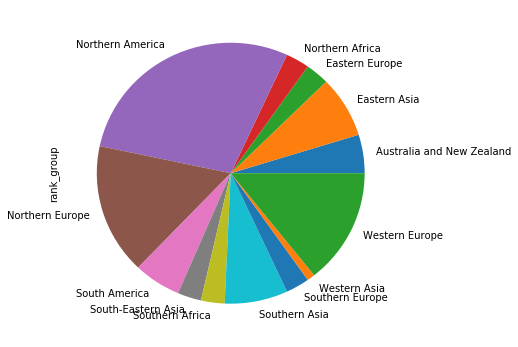

In [74]:
p1 = sample100.groupby(['subregion']).count().plot.pie(figsize=(6,6), y='rank_group', legend=False)

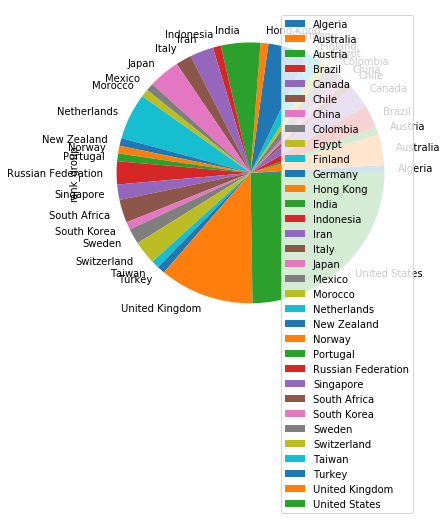

In [75]:
p2 = sample100.groupby(['country']).count().plot.pie(figsize=(6,6), y='rank_group')